# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Emotions Analysis | Bidirectional GRU |

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">About Dataset</p>

## Introduction:
- "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. 
- This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

## About the Dataset:
- Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. 
- The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). 
- Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

## Key Features:
- text: A string feature representing the content of the Twitter message.
- label: A classification label indicating the primary emotion, with values ranging from 0 to 5.
## Potential Use Cases:
- Sentiment Analysis: Uncover the prevailing sentiments in English Twitter messages across various emotions.
- Emotion Classification: Develop models to accurately classify tweets into the six specified emotion categories.
- Textual Analysis: Explore linguistic patterns and expressions associated with different emotional states.


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Importing Libraries</p>

In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Loading Data</p>


In [97]:
# Load Data 
df = pd.read_csv('text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [98]:
# Shape Of Data 
print(f'The Shape Of Data Is : {df.shape}')

The Shape Of Data Is : (416809, 3)


In [99]:
# Null Values 
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [100]:
# Duplicates
df.duplicated().sum()

0

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Renaming The Columns Names</p>


In [101]:
# Rename Columns 
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
# Dropping the Index Colums
df.drop('Unnamed: 0',axis=1,inplace=True)

In [102]:
# Head Of Data
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [103]:
data=df.copy()

In [104]:
# Lets Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Label Count</p>


C:\Users\user\AppData\Local\Temp\ipykernel_17540\3778936138.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


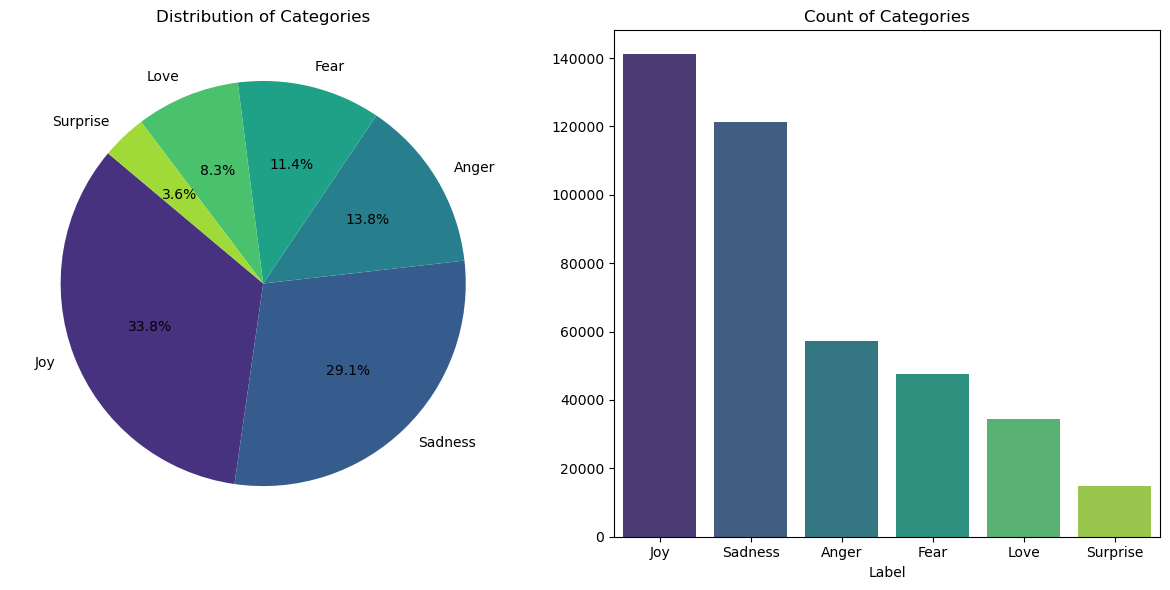

In [105]:
# Value Count Of Label
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Two Seperate Data Set for Visualizng text</p>

In [106]:
# Make Seperate Data Set to Visualize text 
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Visualizing Text Using Word Cloud</p>

***A word cloud is a visual representation of text data in which the frequency of each word's occurrence is depicted by the size of the word.*** 

***Words that appear more frequently in the text are typically displayed with a larger font size, while less frequent words are smaller.***

***Word clouds are often used to quickly and visually summarize the most common words or themes within a large body of text.***

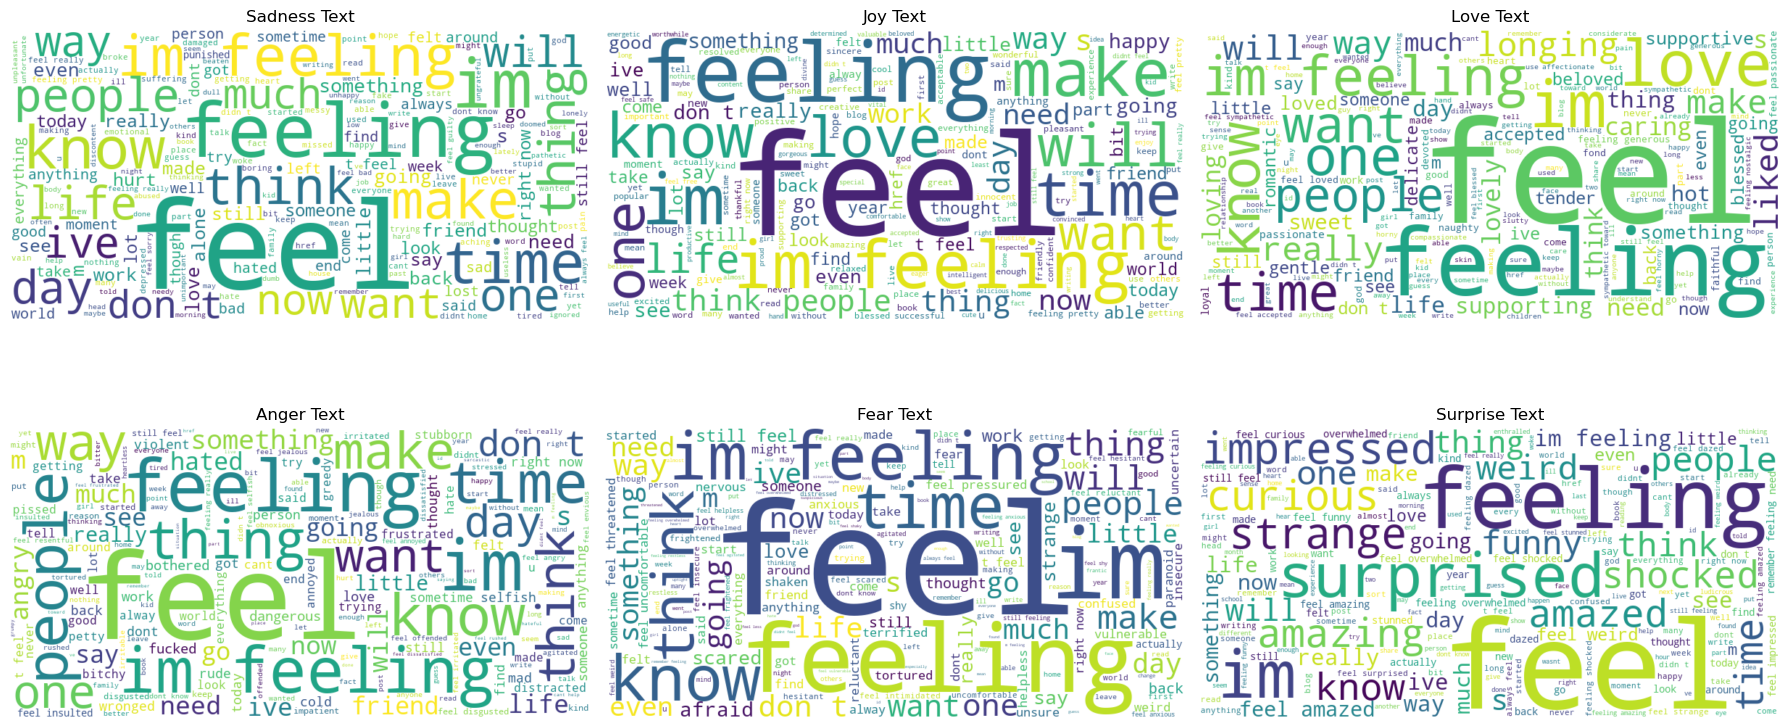

In [107]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love Text')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Text')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Text')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise Text')
plt.axis('off')

plt.tight_layout()
plt.show()

In [108]:
data.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#6A5ACD;">Text Preprocessing</p>

1. **Step 1: Remove URLs:** Uses a regular expression to remove URLs from the text data.

2. **Step 2: Remove special characters and punctuation:** Uses a regular expression to remove any special characters and punctuation marks from the text.

3. **Step 3: Remove extra whitespaces:** Uses a regular expression to remove extra whitespaces and replace them with a single space.

4. **Step 4: Remove numeric values:** Uses a regular expression to remove any numeric values from the text.

5. **Step 6: Lowercasing:** Converts all text to lowercase to ensure consistency.

6. **Step 8: Remove stop words:** Removes common English stop words, such as "the," "is," "and," etc., using NLTK's stopwords list.

7. **Step 9: Remove non-alphanumeric characters:** Uses a regular expression to remove any non-alphanumeric characters from the text.



In [109]:
# Import Basis Needed Libaries 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Download NLTK resources (uncomment the following line if not already downloaded)?
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Url's</p>

In [110]:
# Step 1: Remove URLs
data['Text'] = data['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(data.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Special Characters and Punctuation</p>

In [111]:
# Step 2: Remove special characters and punctuation
data['Text'] = data['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(data.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove WhiteSpaces Extra's</p>

In [112]:
# Step 3: Remove extra whitespaces
data['Text'] = data['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(data.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Numeric Values in Text</p>

In [113]:
# Step : 4 Remove numeric values
data['Text'] = data['Text'].str.replace(r'\d+', '', regex=True)

# Head
data.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Lower Casing text</p>

In [114]:
# Step 6: Lowercasing
data['Text'] = data['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(data.head())

                                                Text  Label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Stopwords</p>

In [115]:

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
# Step 8: Remove stop words
stop = stopwords.words('english')
data["Text"] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
data.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Remove Non-alpha Numeric</p>

In [117]:
# Step : 9 Remove non-alphanumeric characters from the 'Text' column
data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
data.head()

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Train Test Split</p>

In [118]:
X = data['Text']
y = data['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (291766,)
X_test shape: (125043,)
y_train shape: (291766,)
y_test shape: (125043,)


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Tokenization and Padding Sequences</p>

- 1. ***Tokenization:*** The text data in `X_train` and `X_test` is tokenized using the Tokenizer class from Keras. This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. The `num_words` parameter limits the vocabulary size to 50,000 most frequent words.

- 2. ***Padding:*** After tokenization, the sequences in `X_train` and `X_test` are padded to ensure uniform length. This is achieved using the pad_sequences function, which pads sequences with zeros to make them all of the same length (`maxlen`). Padding is done after the sequences to ensure that the actual content of the text is preserved.



In [119]:

# from textacy import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import GRU, Dense,BatchNormalization,Embedding,Dropout,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer

In [120]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
# Converts each sentence into a sequence of numbers based on the word index
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [121]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 79


In [ ]:
# Perform padding on X_train and X_test sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

# Print the padded sequences for X_train and X_test
print("X_train_padded:")
print(X_train_padded)
print("\nX_test_padded:")
print(X_test_padded)

X_train_padded:
[[  74    1   55 ...    0    0    0]
 [ 353  139  140 ...    0    0    0]
 [  39    2  201 ...    0    0    0]
 ...
 [   1  591    0 ...    0    0    0]
 [   4   15  472 ...    0    0    0]
 [   1  147 1738 ...    0    0    0]]

X_test_padded:
[[  120    39   169 ...     0     0     0]
 [ 3037 15005   785 ...     0     0     0]
 [  188   303    48 ...     0     0     0]
 ...
 [    1   415   275 ...     0     0     0]
 [   17   175  1162 ...     0     0     0]
 [  149     1     3 ...     0     0     0]]


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Input Size</p>

In [38]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

50000

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Building</p>

- `model = Sequential()` initializes a sequential model, allowing layers to be added in sequence.

- The `Embedding` layer is added to the model. It is responsible for converting input integers (each representing a word index) into dense vectors of fixed size. This layer is essential for handling textual data.

- `Dropout` layer with a dropout rate of 0.5 is added next. Dropout layers help prevent overfitting by randomly setting a fraction of input units to zero during training.

- GRU layers are added sequentially. The `return_sequences=True` argument ensures that the output sequences are returned for each timestep.

- `BatchNormalization` layer is added to normalize the activations of the previous layer at each batch, aiding in faster and more stable training.

- The final `Dense` layer with 6 units (for 6 classes) and softmax activation function is added as the output layer for multi-class classification.

- The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the evaluation metric.

- `model.summary()` prints the summary of the model, displaying the architecture and parameter details.

In [94]:
maxlen = max(len(tokens) for tokens in X_train_sequences)
maxlen

4

In [ ]:
# Define the model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
model.add(Dropout(0.5))

# Add Bidirectional LSTM layer
model.add(GRU(120, return_sequences=True))
model.add(GRU(64, return_sequences=True))

#Batch Normalization
model.add(BatchNormalization())

# Add Bidirectional GRU layer
model.add(GRU(64))

# Add output layer
model.add(Dense(6, activation='softmax'))

# Explicitly build the model to avoid "unbuilt" issue
model.build(input_shape=(None, maxlen))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 79, 50)         │     2,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 79, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 79, 120)        │        61,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 79, 64)         │        35,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 79, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,623,238 (10.01 MB)

 Trainable params: 2,623,110 (10.01 MB)

 Non-trainable params: 128 (512.00 B)

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Model Fitting</p>

In [54]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.3264 - loss: 1.5964 - val_accuracy: 0.3379 - val_loss: 1.6253
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.3624 - loss: 1.5313 - val_accuracy: 0.7511 - val_loss: 0.7784
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 0.8063 - loss: 0.5776 - val_accuracy: 0.9237 - val_loss: 0.2080
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 523s 3s/step - accuracy: 0.9223 - loss: 0.1904 - val_accuracy: 0.9363 - val_loss: 0.1099
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.9370 - loss: 0.1177 - val_accuracy: 0.9366 - val_loss: 0.0987


# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Visualizing Results</p>

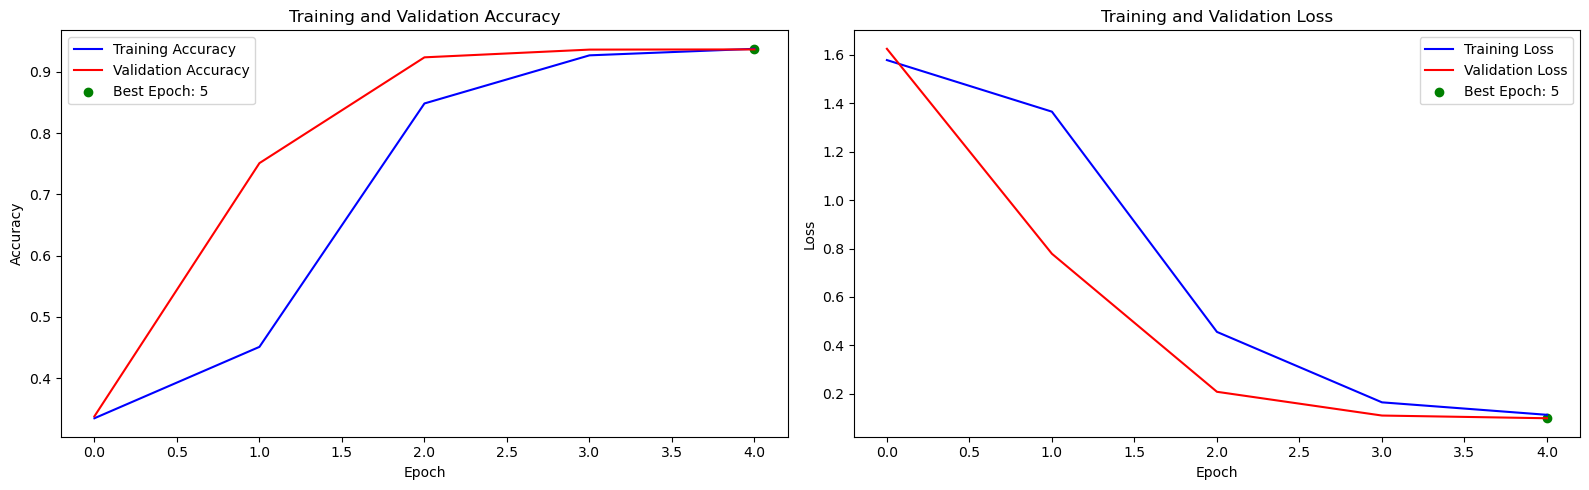

In [60]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">Test Accuracy</p>

In [61]:
# Evaluate Test Data 
model.evaluate(X_test_padded, y_test)

3908/3908 ━━━━━━━━━━━━━━━━━━━━ 77s 20ms/step - accuracy: 0.9365 - loss: 0.0984


[0.09873485565185547, 0.9365978240966797]

In [62]:
# Predictions On Test For Confustion Matrix 
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

3908/3908 ━━━━━━━━━━━━━━━━━━━━ 89s 23ms/step


<Axes: >

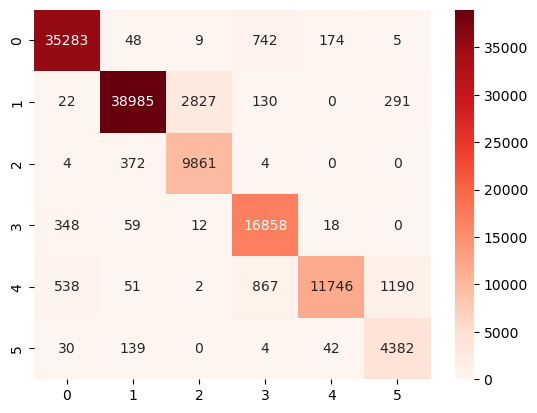

In [63]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

In [64]:
# Define the model
bdmodel = Sequential()

# Add embedding layer
bdmodel.add(Embedding(input_dim=input_Size, output_dim=50, input_length=maxlen))

# Dropout
bdmodel.add(Dropout(0.5))

# Add Bidirectional LSTM layer
bdmodel.add(Bidirectional(GRU(120, return_sequences=True)))
bdmodel.add(Bidirectional(GRU(64, return_sequences=True)))

#Batch Normalization
bdmodel.add(BatchNormalization())

# Add Bidirectional GRU layer
bdmodel.add(Bidirectional(GRU(64)))

# Add output layer
bdmodel.add(Dense(6, activation='softmax'))

# Explicitly build the model to avoid "unbuilt" issue
bdmodel.build(input_shape=(None, maxlen))

# Compile the model
bdmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
bdmodel.summary()

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 79, 50)         │     2,500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 79, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 79, 240)        │       123,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 79, 128)        │       117,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 79, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817,126 (10.75 MB)

 Trainable params: 2,816,870 (10.75 MB)

 Non-trainable params: 256 (1.00 KB)

In [65]:
# Model Train 
history = bdmodel.fit(X_train_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1121s 6s/step - accuracy: 0.5798 - loss: 1.0829 - val_accuracy: 0.8609 - val_loss: 0.8169
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 54832s 283s/step - accuracy: 0.9290 - loss: 0.1459 - val_accuracy: 0.9168 - val_loss: 0.2003
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1049s 5s/step - accuracy: 0.9396 - loss: 0.1083 - val_accuracy: 0.9355 - val_loss: 0.1083
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1115s 6s/step - accuracy: 0.9417 - loss: 0.0971 - val_accuracy: 0.9332 - val_loss: 0.0992
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1347s 7s/step - accuracy: 0.9451 - loss: 0.0897 - val_accuracy: 0.9329 - val_loss: 0.1001


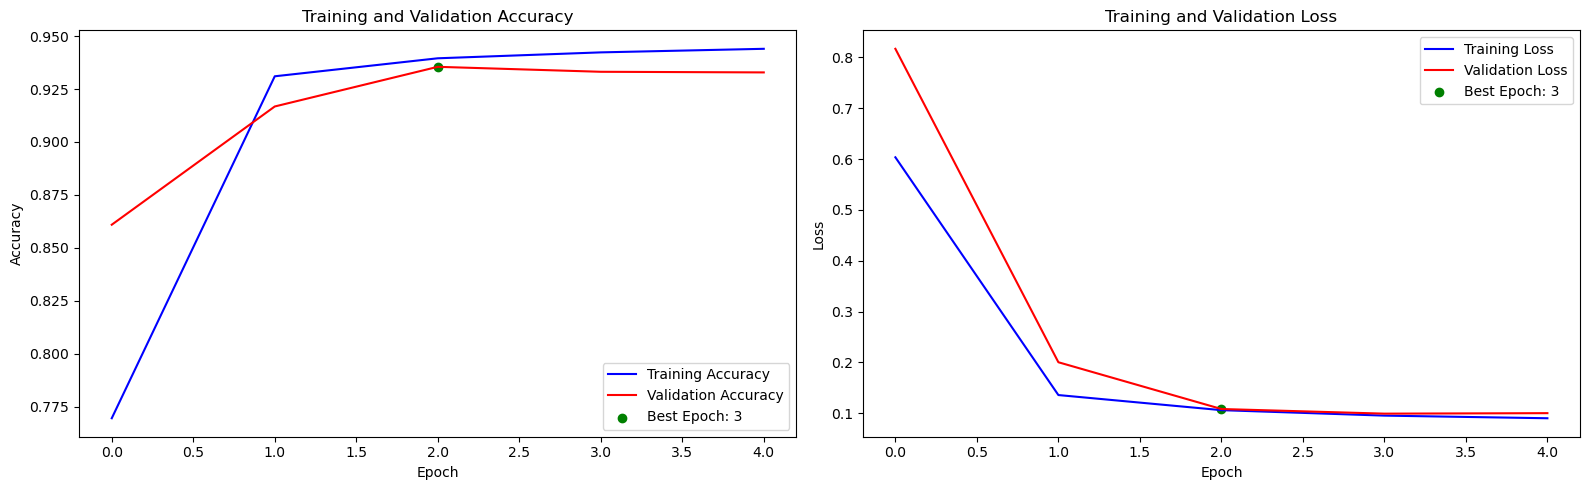

In [66]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()


# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [67]:
# Evaluate Test Data 
bdmodel.evaluate(X_test_padded, y_test)

3908/3908 ━━━━━━━━━━━━━━━━━━━━ 134s 34ms/step - accuracy: 0.9331 - loss: 0.0998


[0.1001269519329071, 0.9328631162643433]

In [68]:
import joblib

# Save vectorizer and model
joblib.dump(tokenizer, 'tokenizer.pkl')
joblib.dump(model, 'model.pkl')
joblib.dump(bdmodel, 'bdmodel.pkl')

['bdmodel.pkl']

In [69]:
stemmer = nltk.SnowballStemmer("english")

In [78]:
def text_cleaning(text): 
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop])

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text

In [79]:
data

,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4
...,...,...
416804,feel like telling horny devils find site suite...,2
416805,began realize feeling agitated restless would ...,3
416806,feel curious previous early dawn time seek tro...,5
416807,feel becuase tyranical nature government el sa...,3


In [80]:
# Label=[sadness(0),
# 	Joy (1),
# 	Love (2),
# 	Anger (3),
# 	Fear (4),
# 	Surprise (5)]

In [81]:
sample=["I can't stop crying today. 💔","I'm so happy for you! 🎉","I love spending time with my family. ❤️","This is absolutely infuriating! 😡","This is absolutely infuriating! 😡","I'm really scared about the future. 😨","Wow, I didn't see that coming! 😲"]

In [130]:
new_data=pd.DataFrame(sample,columns=['Text'])

In [131]:
new_data

,Text
0,I can't stop crying today. 💔
1,I'm so happy for you! 🎉
2,I love spending time with my family. ❤️
3,This is absolutely infuriating! 😡
4,This is absolutely infuriating! 😡
5,I'm really scared about the future. 😨
6,"Wow, I didn't see that coming! 😲"


In [132]:
new_data['text']=new_data['Text'].apply(text_cleaning)

In [133]:
new_data

,Text,text
0,I can't stop crying today. 💔,cant stop cri today
1,I'm so happy for you! 🎉,happi you
2,I love spending time with my family. ❤️,love spend time famili
3,This is absolutely infuriating! 😡,absolut infuri
4,This is absolutely infuriating! 😡,absolut infuri
5,I'm really scared about the future. 😨,realli scare futur
6,"Wow, I didn't see that coming! 😲",wow see come


In [134]:
x=new_data['text']

In [135]:
# Tokenize the sample data
tokenizer.fit_on_texts(x)

# Converts each sentence into a sequence of numbers based on the word index
Sample_sequences = tokenizer.texts_to_sequences(x)

In [136]:
Sample_sequences_padded = pad_sequences(Sample_sequences, maxlen=maxlen, padding='post')


In [137]:
maxlen

79

In [139]:
Sample_sequences_padded

array([[   43,   207, 40556,    45,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [40557, 40558,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     

In [141]:
# Convert to NumPy array
Sample_sequences_padded = np.array(Sample_sequences_padded)

In [142]:
pred=model.predict(Sample_sequences_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


In [146]:
pred1=bdmodel.predict(Sample_sequences_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [144]:
pred

array([[1.79849237e-01, 2.99761921e-01, 6.80169417e-03, 4.21208024e-01,
        8.89091268e-02, 3.47001827e-03],
       [2.21816584e-01, 1.81056723e-01, 5.17922221e-03, 4.84614611e-01,
        1.03682987e-01, 3.64990858e-03],
       [8.63671482e-01, 8.93260445e-03, 7.18651048e-04, 1.02501556e-01,
        2.37118676e-02, 4.63876058e-04],
       [1.02569923e-01, 5.50839663e-01, 6.72024535e-03, 2.30238065e-01,
        1.05214275e-01, 4.41789068e-03],
       [1.02569923e-01, 5.50839663e-01, 6.72024535e-03, 2.30238065e-01,
        1.05214275e-01, 4.41789068e-03],
       [2.07027510e-01, 1.60814255e-01, 4.58523957e-03, 4.94237602e-01,
        1.29533634e-01, 3.80169274e-03],
       [1.67109624e-01, 2.94131994e-01, 5.27915359e-03, 3.89022380e-01,
        1.41002744e-01, 3.45399277e-03]], dtype=float32)

sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)

<!-- # # Example class labels (update these based on your dataset)
# emotion_labels = ['Sadness','Joy', 'Love', 'Anger', 'Fear', 'Surprise']

# # Get the predicted class indices
# predicted_classes = np.argmax(pred, axis=1)

# # Convert to emotion labels
# predicted_emotions = [emotion_labels[i] for i in predicted_classes]

# print(predicted_emotions) -->

<!-- # Example class labels (update these based on your dataset)
emotion_labels = ['Sadness','Joy', 'Love', 'Anger', 'Fear', 'Surprise']

# Get the predicted class indices
predicted_classes = np.argmax(pred1, axis=1)

# Convert to emotion labels
predicted_emotions = [emotion_labels[i] for i in predicted_classes]

print(predicted_emotions) -->

# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:#6A5ACD;">The End</p>